In [80]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [81]:
class Cell(object):
    def __init__(self, x=None, y=None, ctype='A', scount=6, cellid=None):
        self.x = random() * 2 - 1 if x == None else x
        self.y = random() * 2 - 1 if y == None else y
        #self.z = random() * 2 - 1 if z == None else z
        self.type = ctype
        self.scount = scount
        self.id = cellid
        self.connections = []
        
    def position(self, x, y):
        self.x = x
        self.y = y
        #self.z = z
        
    def celltype(self, ctype):
        self.type = ctype
        
    def syncount(self, count):
        self.scount = count
        
    def cellid(self, cid):
        self.id = cid

In [82]:
Apop = 2000
Bpop = 30
axon_width = {
    'A': 0.5,
    'B': 0.2
}
synaptic_counts = {
    'A': {
        'B': 100
    },
    'B': {
        'A': 6
    }
}

In [83]:
Acells = []
Bcells = []
running_id = 0
for _ in range(Apop):
    cell = Cell()
    cell.celltype('A')
    cell.cellid(running_id)
    cell.syncount(synaptic_counts['B']['A'])
    Acells.append(cell)
    running_id += 1
for _ in range(Bpop):
    cell = Cell()
    cell.celltype('B')
    cell.cellid(running_id)
    cell.syncount(synaptic_counts['A']['B'])
    Bcells.append(cell)
    running_id += 1

In [84]:
ncdict = {}
for cell_1 in Bcells:
    presyn_probs = {}
    sum_probs = 0
    for cell_2 in Acells:
#         if cell_1.type == cell_2.type:
#             continue
        dist = np.sqrt((cell_1.x - cell_2.x)**2 + (cell_1.y - cell_2.y)**2)
        sigma = axon_width[cell_2.type]
        presyn_probs[cell_2.id] = 1./(np.sqrt(2 * np.pi * sigma**2)) * (np.e ** (-(dist ** 2) / (2 * sigma**2)))
        sum_probs += presyn_probs[cell_2.id]
    presyn_probs_items = np.array(presyn_probs.items())
#     print(cell_2.type)
#     print(cell_1.type)
    synaptic_counts[cell_2.type][cell_1.type]
    counts = np.random.multinomial(synaptic_counts[cell_2.type][cell_1.type], list(presyn_probs_items[:,1] / float(sum_probs)))
    print("Counts: " + str(counts))
    idxs = []
    for i in range(len(counts)):
        for _ in range(counts[i]):
            idxs.append(i)
    print(idxs)
    presyn_neurons = list(presyn_probs_items[:,0])
    for i in idxs:
        presyn_gid = int(presyn_neurons[i])
        #nc = self.pc.gid_connect(presyn_gid, target.synlist[presyn_key][i])
        cell_1.connections.append(i)
        if (presyn_gid, cell_1.id) in ncdict:
            ncdict[(presyn_gid, cell_1.id)] += 1
        else:
            ncdict[(presyn_gid, cell_1.id)] = 1

Counts: [0 0 0 ... 0 1 0]
[21, 29, 50, 58, 60, 78, 86, 100, 122, 130, 189, 192, 222, 236, 282, 317, 319, 324, 351, 354, 365, 380, 383, 384, 424, 466, 487, 500, 507, 522, 581, 596, 602, 613, 625, 670, 670, 674, 726, 752, 802, 813, 814, 832, 838, 838, 842, 847, 854, 858, 895, 895, 907, 912, 925, 954, 964, 983, 1015, 1023, 1087, 1100, 1132, 1138, 1145, 1154, 1170, 1173, 1178, 1205, 1223, 1258, 1280, 1327, 1348, 1423, 1428, 1454, 1473, 1519, 1538, 1547, 1600, 1666, 1690, 1717, 1747, 1810, 1814, 1816, 1817, 1834, 1843, 1868, 1953, 1955, 1971, 1982, 1989, 1998]
Counts: [0 0 0 ... 0 0 0]
[11, 37, 77, 100, 122, 127, 143, 177, 223, 237, 249, 282, 297, 322, 393, 429, 429, 437, 453, 508, 509, 541, 566, 567, 574, 578, 580, 580, 596, 693, 701, 732, 743, 755, 762, 780, 795, 830, 832, 854, 856, 872, 888, 891, 892, 910, 926, 940, 965, 968, 997, 998, 999, 1019, 1043, 1066, 1117, 1133, 1136, 1137, 1140, 1158, 1159, 1182, 1196, 1212, 1225, 1236, 1250, 1253, 1270, 1284, 1309, 1369, 1403, 1421, 1433, 1482,

Counts: [0 0 0 ... 0 0 0]
[53, 60, 82, 83, 86, 89, 102, 133, 161, 161, 172, 172, 192, 193, 200, 215, 222, 236, 238, 256, 256, 260, 333, 358, 365, 417, 420, 460, 497, 499, 509, 527, 571, 575, 575, 583, 589, 595, 628, 628, 650, 664, 669, 719, 742, 765, 799, 813, 871, 874, 875, 877, 913, 941, 943, 950, 960, 963, 997, 1050, 1062, 1100, 1199, 1259, 1308, 1312, 1312, 1331, 1334, 1338, 1365, 1444, 1477, 1497, 1497, 1501, 1525, 1525, 1556, 1570, 1571, 1588, 1588, 1608, 1618, 1623, 1624, 1627, 1638, 1641, 1673, 1681, 1728, 1801, 1811, 1851, 1854, 1941, 1941, 1972]
Counts: [0 0 0 ... 0 0 0]
[8, 59, 112, 148, 158, 216, 234, 271, 284, 287, 333, 340, 350, 362, 399, 429, 445, 446, 446, 451, 451, 474, 483, 487, 511, 545, 558, 561, 571, 590, 616, 634, 675, 675, 708, 713, 747, 796, 803, 808, 824, 833, 833, 904, 905, 908, 913, 934, 936, 942, 947, 956, 974, 980, 995, 1033, 1055, 1108, 1216, 1216, 1253, 1254, 1268, 1269, 1280, 1292, 1295, 1305, 1318, 1323, 1332, 1332, 1339, 1366, 1381, 1386, 1388, 1490, 1

In [85]:
Bcells[-1].connections

[6,
 16,
 16,
 18,
 32,
 47,
 55,
 55,
 68,
 137,
 164,
 205,
 205,
 205,
 267,
 279,
 312,
 330,
 346,
 346,
 356,
 386,
 400,
 400,
 409,
 413,
 426,
 436,
 443,
 496,
 525,
 544,
 557,
 565,
 565,
 593,
 603,
 603,
 622,
 630,
 637,
 638,
 640,
 646,
 654,
 680,
 682,
 696,
 696,
 706,
 740,
 761,
 761,
 763,
 764,
 812,
 825,
 834,
 845,
 908,
 937,
 1000,
 1023,
 1024,
 1056,
 1083,
 1084,
 1095,
 1164,
 1172,
 1200,
 1201,
 1206,
 1227,
 1302,
 1335,
 1484,
 1486,
 1487,
 1568,
 1589,
 1594,
 1611,
 1632,
 1642,
 1645,
 1687,
 1700,
 1719,
 1729,
 1795,
 1814,
 1843,
 1864,
 1887,
 1889,
 1902,
 1938,
 1944,
 1962]

In [86]:
list(presyn_probs_items[:,1] / float(sum_probs))

[3.6685147680667634e-05,
 6.700386476753755e-05,
 0.000592667446745196,
 8.154204495576143e-06,
 0.0005812724501738394,
 0.0005855932303636235,
 0.0015986542013462044,
 0.0021045244981938585,
 0.00010097824614404191,
 0.0002242652979271487,
 3.6986360602937646e-06,
 0.0001622111252502299,
 1.1891863465372933e-06,
 6.138940574832568e-05,
 0.0008620942298294745,
 0.00014328258937666772,
 0.0019839911380195537,
 0.00010294588603804953,
 0.001734890469614206,
 0.0011436575454857544,
 0.0001734467856089575,
 2.112339879321282e-05,
 0.00015421388919322965,
 2.5809014984276147e-06,
 0.00020722115136112605,
 9.699480771686711e-08,
 9.703106060272422e-06,
 0.0008361480426416682,
 0.0022846416130335597,
 5.5751586710737165e-06,
 0.0003895748052074998,
 1.0929071675944034e-05,
 0.0015632773363027993,
 0.00021322398072838513,
 0.0019109749858317313,
 0.00010261658838378391,
 3.1698842886452855e-05,
 8.97491373132655e-05,
 7.348363210839631e-05,
 2.404767130278393e-05,
 1.8014593782051993e-06,
 0.0

In [87]:
presyn_probs_items[:,1][0]

0.011818999177957512

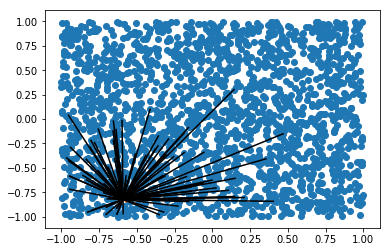

In [88]:
xs = []
ys = []
for cell in Acells:
    xs.append(cell.x)
    ys.append(cell.y)
    
plt.scatter(x=xs, y=ys, marker='o')
plt.scatter(x=Bcells[-1].x, y=Bcells[-1].y, marker='x')

for conn in Bcells[-1].connections:
    plt.plot([Bcells[-1].x, Acells[conn].x], [Bcells[-1].y, Acells[conn].y], 'k-')

plt.show()

In [89]:
# Acells_arr = np.array(Acells)
# [cell.x for cell in Acells_arr[Bcells[-1].connections]]

In [90]:
np.linspace(-1.0, 1.0, 21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

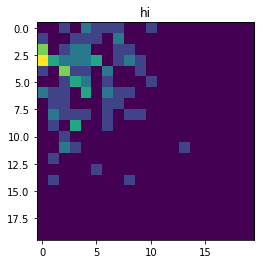

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [92]:
Acells_arr = np.array(Acells)
Bcells_arr = np.array(Bcells)
vals, bounds_x, bounds_y = np.histogram2d(x=[cell.x for cell in Acells_arr[Bcells[-1].connections]], y=[cell.y for cell in Acells_arr[Bcells[-1].connections]], bins=np.linspace(-1.0, 1.0, 21))
plt.imshow(vals)
plt.title("hi")
plt.show()
print(bounds_x)
print(bounds_y)

# Two Cells

In [94]:
cellA = Cell(-1, -1, 'A', 1, 0)

In [114]:
cellB = Cell(1, 1, 'B', 1, 1)

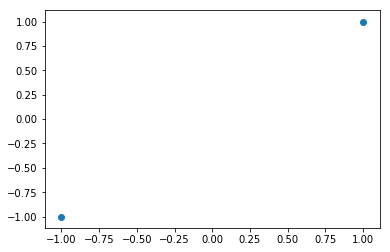

In [115]:
plt.scatter(x=[cellA.x, cellB.x], y=[cellA.y, cellB.y], marker='o')
#plt.plot((cellB.x, cellB.y))

In [122]:
dist = np.sqrt((cellA.x - cellB.x)**2 + (cellA.y - cellB.y)**2)
sigma = axon_width[cellB.type]
probs = 1./(np.sqrt(2 * np.pi * sigma**2)) * (np.e ** (-(dist ** 2) / (2 * sigma**2)))

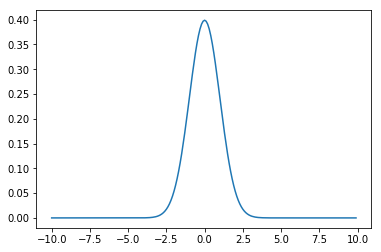

In [138]:
sigma = 1
y = [1./(np.sqrt(2 * np.pi * sigma**2)) * (np.e ** (-(x ** 2) / (2 * sigma**2))) for x in np.arange(-10, 10, 0.1)]
plt.plot(np.arange(-10, 10, 0.1), y)

In [139]:
# do histogram checking of cells!

In [94]:
from collections import defaultdict

In [95]:
test = defaultdict(lambda: defaultdict(list))

In [97]:
test['A']['B']

[]

In [98]:
plt.imshow?

In [99]:
plt.pcolor?